In [1]:
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
num_segments = 16

In [3]:
hprescan = 3
hoverscan = 64
voverscan = 48

In [4]:
filter = 'FELH0600'

file_dict = {'FELH0600':'master_flat_median_20220608_FELH0600_87_167_renormalised.fits',
             'BG40':'master_flat_median_20220608_BG40_66_86_renormalised.fits'}
file_dict_hf = {'FELH0600':'master_flat_median_20220608_FELH0600_87_167_renormalised_high_frequency.fits',
             'BG40':'master_flat_median_20220608_BG40_66_86_renormalised_high_frequency.fits'}

In [5]:
flat_file = file_dict[filter]
assert filter in flat_file
flat = fits.open(flat_file)
flat.info()

Filename: master_flat_median_20220608_FELH0600_87_167_renormalised.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     137   ()      
  1  Segment00     1 ImageHDU       115   (576, 2048)   float64   
  2  Segment01     1 ImageHDU       115   (576, 2048)   float64   
  3  Segment02     1 ImageHDU       115   (576, 2048)   float64   
  4  Segment03     1 ImageHDU       115   (576, 2048)   float64   
  5  Segment04     1 ImageHDU       115   (576, 2048)   float64   
  6  Segment05     1 ImageHDU       115   (576, 2048)   float64   
  7  Segment06     1 ImageHDU       115   (576, 2048)   float64   
  8  Segment07     1 ImageHDU       115   (576, 2048)   float64   
  9  Segment17     1 ImageHDU       115   (576, 2048)   float64   
 10  Segment16     1 ImageHDU       115   (576, 2048)   float64   
 11  Segment15     1 ImageHDU       115   (576, 2048)   float64   
 12  Segment14     1 ImageHDU       115   (576, 2048)   float64   
 13  Segmen

In [6]:
shape0 = flat[1].data.shape
print(shape0)

(2048, 576)


In [7]:
for seg in range(1,9):
    print(seg,flat[seg].header['EXTNAME'])
    data_ = flat[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        dred0 = data_
    else:
        dred0 = np.concatenate((dred0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    print(seg,flat[seg].header['EXTNAME'])
    data_ = flat[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        dred1 = data_
    else:
        dred1 = np.concatenate((dred1,data_),axis=1)
data0red = np.concatenate((dred0,dred1),axis=0)

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
16 Segment10
15 Segment11
14 Segment12
13 Segment13
12 Segment14
11 Segment15
10 Segment16
9 Segment17


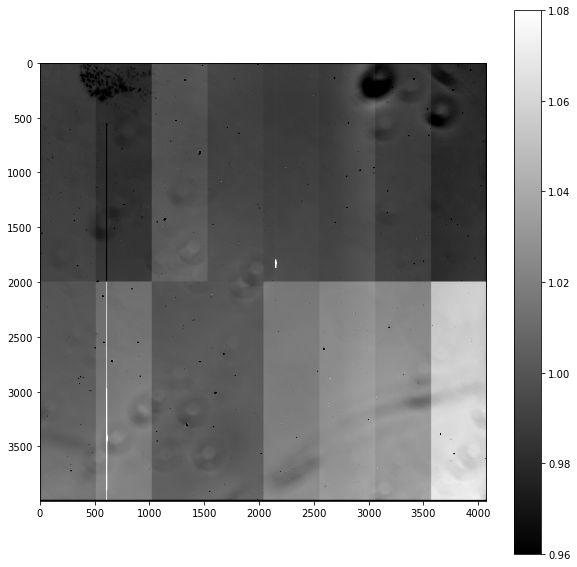

In [8]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
im = ax.imshow(data0red,cmap="gray",vmin=0.96,vmax=1.08)#,norm=LogNorm())
fig.colorbar(im,ax=ax)
plt.savefig('./ccd_image_{0}.png'.format(filter))

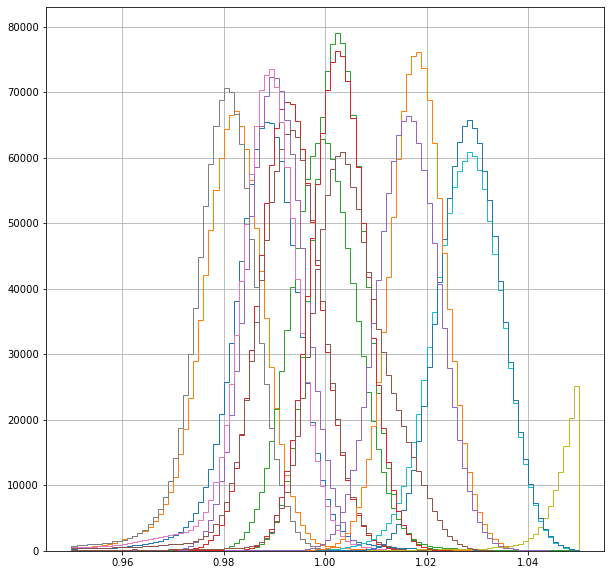

In [9]:
median_vec = []
plt.figure(figsize=(10,10))
for seg in range(1,num_segments+1):
    data_ = flat[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    plt.hist(data_.ravel(),bins=100,range=(0.95,1.05),histtype='step')
    median_vec.append(np.median(data_.ravel()))
plt.grid()

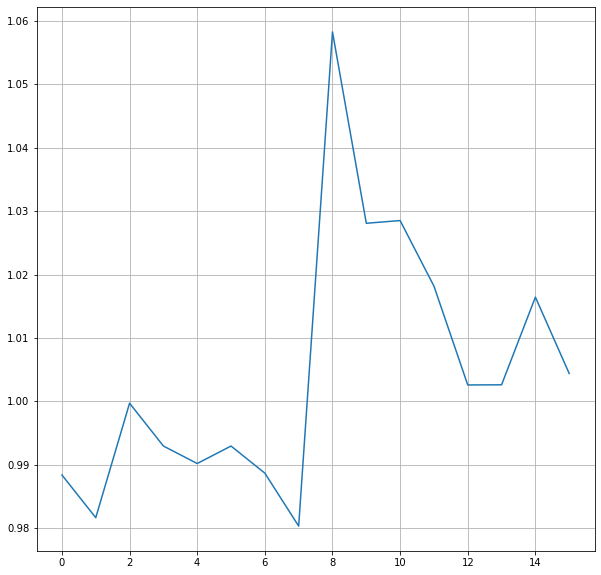

In [10]:
median_vec = np.array(median_vec)
plt.figure(figsize=(10,10))
plt.plot(np.arange(num_segments),median_vec)
plt.grid()

In [11]:
row = 10

In [12]:
vec1 = flat[1].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan][row,:]
print(vec1.shape)
vec2 = flat[2].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan][row,:]
vec = np.concatenate((vec1,vec2))
print(vec.shape)

(509,)
(1018,)


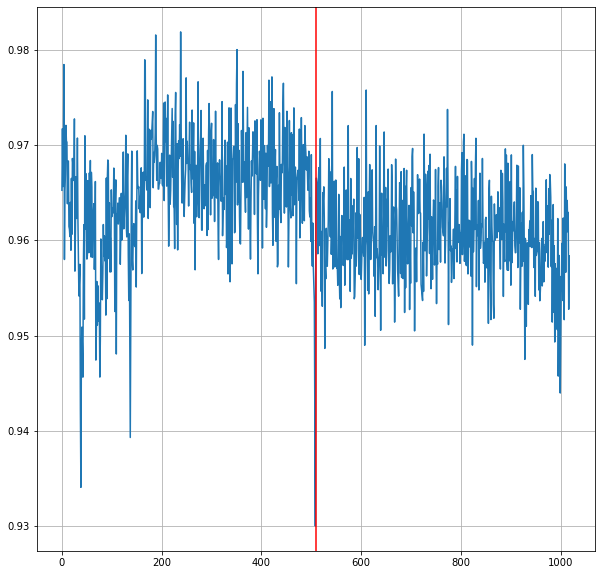

In [13]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(len(vec)),vec)
plt.axvline(x=509,color='r')
plt.grid()

# Repeat for flats with smooth component removed 

In [14]:
flat_filehf = file_dict_hf[filter]
assert filter in flat_filehf
flathf = fits.open(flat_filehf)
flathf.info()

Filename: master_flat_median_20220608_FELH0600_87_167_renormalised_high_frequency.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     137   ()      
  1  Segment00     1 ImageHDU       115   (576, 2048)   float64   
  2  Segment01     1 ImageHDU       115   (576, 2048)   float64   
  3  Segment02     1 ImageHDU       115   (576, 2048)   float64   
  4  Segment03     1 ImageHDU       115   (576, 2048)   float64   
  5  Segment04     1 ImageHDU       115   (576, 2048)   float64   
  6  Segment05     1 ImageHDU       115   (576, 2048)   float64   
  7  Segment06     1 ImageHDU       115   (576, 2048)   float64   
  8  Segment07     1 ImageHDU       115   (576, 2048)   float64   
  9  Segment17     1 ImageHDU       115   (576, 2048)   float64   
 10  Segment16     1 ImageHDU       115   (576, 2048)   float64   
 11  Segment15     1 ImageHDU       115   (576, 2048)   float64   
 12  Segment14     1 ImageHDU       115   (576, 2048)   float64

In [15]:
shape1 = flathf[1].data.shape
print(shape1)

(2048, 576)


In [16]:
for seg in range(1,9):
    print(seg,flathf[seg].header['EXTNAME'])
    data_ = flathf[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=1)
    if seg==1:
        dred0 = data_
    else:
        dred0 = np.concatenate((dred0,data_),axis=1)
for seg in range(9,num_segments+1):
    seg = num_segments+9-seg
    print(seg,flathf[seg].header['EXTNAME'])
    data_ = flathf[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    data_ = np.flip(data_,axis=0)
    data_ = np.flip(data_,axis=1)
    if seg==16:
        dred1 = data_
    else:
        dred1 = np.concatenate((dred1,data_),axis=1)
data0redhf = np.concatenate((dred0,dred1),axis=0)

1 Segment00
2 Segment01
3 Segment02
4 Segment03
5 Segment04
6 Segment05
7 Segment06
8 Segment07
16 Segment10
15 Segment11
14 Segment12
13 Segment13
12 Segment14
11 Segment15
10 Segment16
9 Segment17


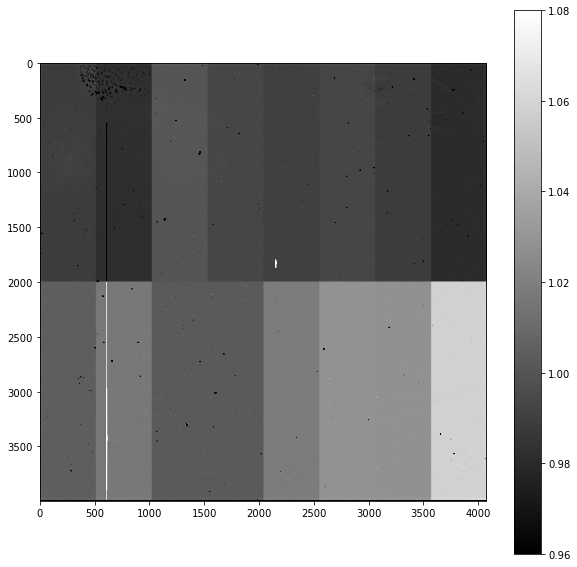

In [17]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
im = ax.imshow(data0redhf,cmap="gray",vmin=0.96,vmax=1.08)#,norm=LogNorm())
fig.colorbar(im,ax=ax)
plt.savefig('./ccd_image_{0}_high_frequency.png'.format(filter))

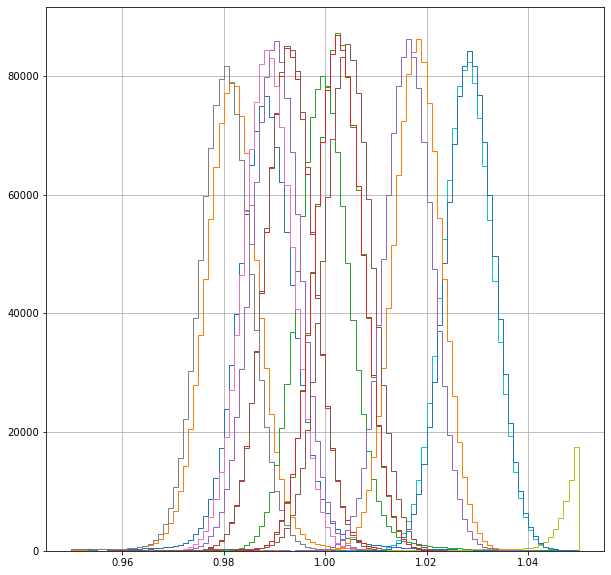

In [18]:
median_vechf = []
plt.figure(figsize=(10,10))
for seg in range(1,num_segments+1):
    data_ = flathf[seg].data[:shape0[0]-voverscan,hprescan:shape0[1]-hoverscan]
    plt.hist(data_.ravel(),bins=100,range=(0.95,1.05),histtype='step')
    median_vechf.append(np.median(data_.ravel()))
plt.grid()

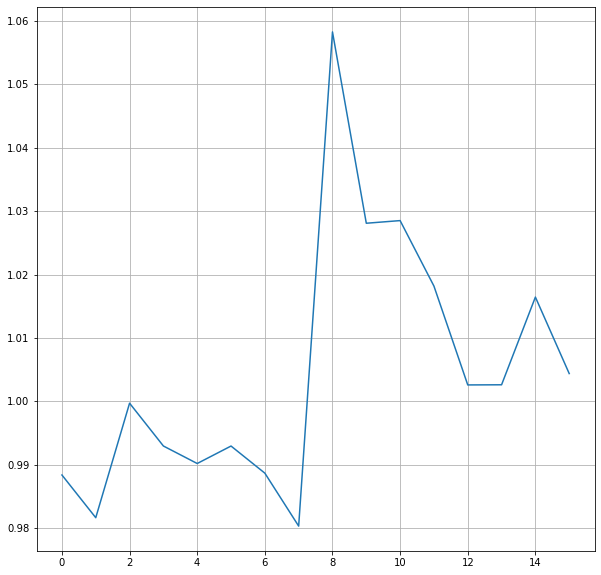

In [19]:
median_vechf = np.array(median_vechf)
plt.figure(figsize=(10,10))
plt.plot(np.arange(num_segments),median_vechf)
plt.grid()
#plt.ylim((0.98,1.06))